!pip install plotly
!pip install cufflinks
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
# !pip install imblearn
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

import sort_dataframeby_monthorweek as sd

# 데이터 불러오기 및 전처리 코드

In [7]:
df = pd.read_csv('C:/workspace/Python/머신러닝 플젝/hotel_bookings_cancel.csv', header = 0)

In [8]:
# reservation_status 열 제거

df = df.drop(['reservation_status'], axis = 1)

# chilsdren, babies 의 결측치 제거한 후 둘의 수를 더한 후, 자녀의 유무를 0, 1로 나타낸 
# kids 열 생성.

df['children'] = df['children'].fillna(0)
df['babies'] = df['babies'].fillna(0)
df["kids"] = df["children"] + df["babies"]
df.loc[df.kids != 0, 'kids'] = 1

# total_guest열 생성.
df['total_guest'] = df['adults'] + df['children'] +df['kids']

# agent 결측치 제거 후 agent의 유무를 0, 1 로 나타냄.
df['agent'] = df['agent'].fillna(0)
df.loc[df.agent != 0,'agent'] = 1 #df[df.loc[df['agent'] != 0]] = 1

In [9]:
# 전처리 끝난 후 원본 데이터를 건드리지 않는 ml 데이터를 따로 만듦.
# (특성 가변적으로 선택하기 위해)

df_ml = df.drop(["adults", "children", "babies", "assigned_room_type", "reserved_room_type","arrival_date_day_of_month", "required_car_parking_spaces", "total_of_special_requests"], axis = 1)
print(df.shape, df_ml.shape)

(119390, 25) (119390, 17)


In [10]:
# X, y 나누고 더미화, 오버샘플링(복원추출 통해 0, 1 값 균등하게 맞추기.), 스케일링
X = df_ml.drop(['is_canceled'], axis =1)
X = pd.get_dummies(X)
y = df_ml['is_canceled']

# X, y 나누기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 오버샘플링
over = RandomOverSampler()
X_train, y_train = over.fit_resample(X_train, y_train)
df_sample = pd.DataFrame(X_train, columns=X_train.columns)

# X 값 스케일링
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


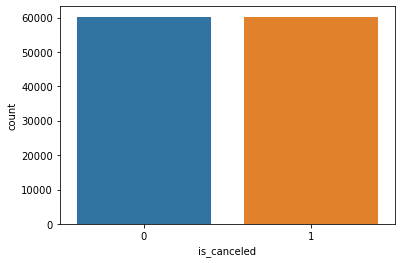

In [11]:
sns.countplot(y_train);

# 1차 모델링 (각 모델링 디폴트 값으로 시도)

In [12]:
# 수학적 분류모델 => standard scaling 적용.

In [13]:
# 로지스틱 회귀모델
lr = LogisticRegression()
lr.fit(X_train_s, y_train)

print('훈련 데이터 점수 : {}'.format(lr.score(X_train_s, y_train)))
print('평가 데이터 점수 : {}'.format(lr.score(X_test_s, y_test)))

훈련 데이터 점수 : 0.7422541759373028
평가 데이터 점수 : 0.7575592595694782


In [14]:
# SGD 경사하강법을 적용한 로지스틱 회귀모델
sgd = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
sgd.fit(X_train_s,y_train)

print("학습 데이터 점수 : {}".format(sgd.score(X_train_s,y_train)))
print("평가 데이터 점수 : {}".format(sgd.score(X_test_s,y_test)))

학습 데이터 점수 : 0.7291286155481022
평가 데이터 점수 : 0.7529943881397102


In [15]:
# knn 모델
kn = KNeighborsClassifier()
kn.fit(X_train_s, y_train)

print('훈련 데이터 점수 : {}'.format(kn.score(X_train_s, y_train)))
print('평가 데이터 점수 : {}'.format(kn.score(X_test_s, y_test)))

훈련 데이터 점수 : 0.8643858134360575
평가 데이터 점수 : 0.7555071614038027


In [ ]:
# Support Vector Classifier 모델
svc = SVC()
svc.fit(X_train_s, y_train)

print('훈련 데이터 점수 : {}'.format(svc.score(X_train_s, y_train)))
print('평가 데이터 점수 : {}'.format(svc.score(X_test_s, y_test)))

In [ ]:
# 트리 계열 분류기 모델 => 전처리가 필요하지 않으므로 스케일링 하지 않은 데이터 사용.

In [ ]:
# 결정트리 모델
dt = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)

print("train set score is {:.3f}".format(dt.score(X_train, y_train)))
print("test set score is {:.3f}".format(dt.score(X_test, y_test)))

In [ ]:
# 랜덤 포레스트 모델
forest = RandomForestClassifier(random_state = 42)
forest.fit(X_train, y_train)

print("train set score is {:.3f}".format(forest.score(X_train, y_train)))
print("test set score is {:.3f}".format(forest.score(X_test, y_test)))

In [ ]:
# 그래디언트 부스팅 모델

gbrt = GradientBoostingClassifier(random_state = 42).fit(X_train_s, y_train)

print(gbrt.score(X_train_s, y_train))
print(gbrt.score(X_test_s, y_test))

In [ ]:
# Bagging Classifier(부트스트랩 샘플링으로 오버피팅 방지)

bagging = BaggingClassifier().fit(X_train, y_train)

print(bagging.score(X_train, y_train))
print(bagging.score(X_test, y_test))

In [ ]:
# 특성 선택을 위한 모듈 활용

In [ ]:
# random forest모델의 특성 중요도 확인.

import matplotlib.pyplot as plt
plt.figure(figsize =(25, 25))
def plot_feature_importances_hotel(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('RF Feature Importance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    
plot_feature_importances_hotel(model)


## RFE(recursive feature elimination)
- Backward 방식중 하나(후진소거법)
- 모든 변수를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식이다.)


In [ ]:
# 랜덤포레스트 모델에 RFE 적용
model = RandomForestClassifier().fit(X_train, y_train)

rfe_rf = RFE(model, n_features_to_select = 10, step = 1)
model_rf = rfe_rf.fit(X_train, y_train)

print(model_rf.support_)

print(model_rf.score(X_test_s, y_test))

In [ ]:
# LR모델에 RFE적용.

model = LogisticRegression().fit(X_train_s, y_train)

rfe_lr = RFE(model, n_features_to_select = 5, step = 1)
model_lr = rfe_lr.fit(X_train_s, y_train)

print(model_lr.support_)

print(model_lr.score(X_train_s, y_test))
print(model_lr.score(X_test_s, y_test))


1 : lead_time
2 : arrival_dateday_of_month
13 : adr
62 : deposit_type_No Deposit
63 : deposit_type_Non Refund

In [ ]:
# 하이퍼 파라미터 튜닝
# GridSearch 후 교차검증값 확인.

In [ ]:
# 로지스틱 회귀 그리드 서치 통한 최적 매개변수 탐색.

params = { 'C' : [0.001 , 0.1, 1, 10, 50, 75, 100, 200],
           'max_iter' : [100, 200, 300, 400, 500],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear']}

grid_cv = GridSearchCV(LogisticRegression(random_state = 42), param_grid = params, cv=5, n_jobs = -1) 
grid_cv.fit(X_train_s, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
# 최적 매개변수 활용한 로지스틱 회귀 교차검증

lr = LogisticRegression(C = 0.1, max_iter = 100, solver = 'lbfgs', random_state = 42)
print('교차 검증 점수 : ',format(cross_val_score(estimator=lr ,X=X_train, y=y_train, scoring='accuracy', cv=5, n_jobs=-1)))
cross_lr = cross_val_score(estimator = lr, X=X_train, y = y_train, cv = 5, n_jobs = -1)
print('교차 검증 점수 평균: ', cross_lr.mean())

In [ ]:
# KNeighborsClassifier, SVC 모델의 경우 예측에 걸리는 시간이 너무 오래 걸려 확인 불가능.

In [ ]:
# 트리 계열 모델의 경우, 매개변수 값을 높이면 성능은 올라가나 과적합 문제 발생.
# 따라서, 과적합에 영향을 미치는 max_depth값을 높여가면서 성능 확인.

In [ ]:
# 랜덤포레스트 그리드 서치 통한 최적 매개변수 탐색.

params = { 'n_estimators' : [10, 25, 50, 75, 100],
           'max_depth' : [4, 6, 8, 10, 12, 20]
            }

model = RandomForestClassifier(random_state = 42, n_jobs = -1)
grid_cv = GridSearchCV(model, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
# 랜덤포레스트 max_depth값 조정하면서 훈련/검증 셋 성능비교

score_train_rf = []
score_test_rf = []

for i in range(1, 20):
    forest = RandomForestClassifier(n_estimators = 100, max_depth = i, random_state = 42)
    forest.fit(X_train, y_train)
    
    score_train_rf.append(forest.score(X_train, y_train))
    score_test_rf.append(forest.score(X_test, y_test))

In [ ]:
x_rf = range(1, 20)
plt.plot(x_rf, score_train_rf, label = 'train')
plt.plot(x_rf, score_test_rf, label = 'test')
plt.title('RF score by max_depth')
plt.legend()
plt.show()

train score와 test score 값의 차이가 크지 않으면서 test 성능이 좋은 max_depth = 15 값 활용.

In [ ]:
# 최적 매개변수 활용한 랜덤포레스트 모델의 교차검증
rf = RandomForestClassifier(max_depth = 15, n_estimators = 100, random_state = 42)
print('교차 검증 점수 : ',format(cross_val_score(estimator=rf ,X=X_train, y=y_train, scoring='accuracy', cv=5, n_jobs=-1)))

In [ ]:
# 결정트리 그리드서치 통한 최적 매개변수 탐색.

params = { 'criterion' : ['gini' , 'entropy'],
           'max_depth' : [4, 6, 8, 10, 12, 20],
         'splitter' : ['best', 'random']}

grid_cv = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = params, cv=5, n_jobs = -1)
grid_cv.fit(X_train_s, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [ ]:
# 결정트리 max_depth값 조정하면서 훈련/검증 셋 성능비교

score_train_dt = []
score_test_dt = []

for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth = i, splitter = 'best', random_state = 42)
    dt.fit(X_train, y_train)
    
    score_train_dt.append(dt.score(X_train, y_train))
    score_test_dt.append(dt.score(X_test, y_test))

In [ ]:
x_dt = range(1, 20)
plt.plot(x_dt, score_train_dt, label = 'train')
plt.plot(x_dt, score_test_dt, label = 'test')
plt.legend()
plt.title('DT score by max_depth')
plt.show()

train score와 test score 값의 차이가 크지 않으면서 test 성능이 좋은 max_depth = 12 값 활용.

In [ ]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 12, splitter = 'best', random_state = 42).fit(X_train, y_train)
print("train set score is {:.3f}".format(dt.score(X_train, y_train)))
print("test set score is {:.3f}".format(dt.score(X_test, y_test)))

print('교차 검증 점수 : ',format(cross_val_score(estimator=dt ,X=X_train, y=y_train, cv=5, n_jobs=-1)))
cross_dt = cross_val_score(estimator = dt, X=X_train, y = y_train, cv = 5, n_jobs = -1)
print('교차 검증 점수 평균: ', cross_dt.mean())

# 시각화 Part
- 탐색적 데이터 분석
- 인사이트 도출 목표.

In [ ]:
## 어떤 시즌에 많이 오는가?

In [ ]:
season = df[df['is_canceled']==0]
season_month = season.groupby(['arrival_date_month'])['adr'].mean().reset_index()

season_month.columns=['month','price']

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

season_month = sort_month(season_month, 'month')

plt. figure(figsize = (20, 10))
px.line(season_month, x='month', y = 'price', title = 'Room price per night over the Months', template = 'plotly_dark', 
        labels = dict(month="Month", price="Price (€)"))

In [ ]:
## 취소 고객 분석 - 예약 경로

filter = df['is_canceled'] == 1
cancel_costomers = df[filter]

# agg를 사용하면 나머지 잔여 columns를 살려둠
cancel = cancel_costomers.groupby(['market_segment']).agg('count').reset_index()

# iloc(columns 남김) <-> loc(columns 탈락)
cancel = cancel.iloc[:, :2]
cancel = cancel.rename(columns= {'is_canceled' : 'Num_of_canceled'})

cancel = cancel.sort_values(by='Num_of_canceled',ascending=0)

cancel = cancel.drop(['market_segment'], axis = 1)

In [ ]:
filter = df['is_canceled'] == 0
not_cancel_costomers = df[filter]

# agg를 사용하면 나머지 잔여 columns를 살려둠
cancel_no = not_cancel_costomers.groupby(['market_segment']).agg('count').reset_index()

# iloc(columns 남김) <-> loc(columns 탈락)
cancel_no = cancel_no.iloc[:, :2]
cancel_no = cancel_no.rename(columns= {'is_canceled' : 'Num_of_not_canceled'})

cancel_no = cancel_no.sort_values(by='Num_of_not_canceled',ascending=0)

cancel_no

In [ ]:
# 시각화

px.bar(data_frame = all1 , x = "market_segment", y = ["Num_of_canceled", "Num_of_not_canceled"],  template = 'plotly_dark',
      labels = dict(market_segment="Market_Segment"))

In [ ]:
# 얼마나 오래 머무는가?

In [ ]:
filter = df['is_canceled'] == 0
long = df[filter]
long.shape
long.head()
long['total_nights'] = long['stays_in_weekend_nights'] + long['stays_in_week_nights']

stay = long.groupby(['total_nights']).agg('count').reset_index()
stay = stay.iloc[:, :2]
stay = stay.rename(columns={'is_canceled':'Num_of_stays'})

fig = px.bar(data_frame = stay, x = 'total_nights', y = 'Num_of_stays',
        template = 'plotly_dark',)
fig.update_xaxes(range=[0, 15], tickangle = 45)
fig.update_yaxes(dtick=5000)

In [ ]:
# 취소 고객 분석 - 입금 형태별

In [ ]:
filter = df['is_canceled'] == 1
cancel_customers = df[filter]

# agg를 사용하면 나머지 잔여 columns를 살려둠
cancel = cancel_customers.groupby(['deposit_type']).agg('count').reset_index()

# iloc(columns 남김) <-> loc(columns 탈락)
cancel = cancel.iloc[:, :2]
cancel = cancel.rename(columns= {'is_canceled' : 'Num_of_canceled'})

cancel = cancel.sort_values(by='Num_of_canceled',ascending=0)

cancel = cancel.drop(['deposit_type'], axis = 1)

In [ ]:
filter = df['is_canceled'] == 0
not_cancel_costomers = df[filter]

# agg를 사용하면 나머지 잔여 columns를 살려둠
cancel_no = not_cancel_costomers.groupby(['deposit_type']).agg('count').reset_index()

# iloc(columns 남김) <-> loc(columns 탈락)
cancel_no = cancel_no.iloc[:, :2]
cancel_no = cancel_no.rename(columns= {'is_canceled' : 'Num_of_not_canceled'})

cancel_no = cancel_no.sort_values(by='Num_of_not_canceled',ascending=0)

In [ ]:
all2 = pd.concat([cancel_no, cancel], axis = 1)
all2.dropna()
all2 = all2.sort_values(by='Num_of_not_canceled',ascending=0)
all2

In [ ]:
# 신기한게, 예치금이 없는 경우에는 취소도 많긴 했지만 그만큼 취소를 안 한 사람들도 많았음
# 환불받지 못하는 경우에, 취소하지 않은 경우의 수보다 취소한 경우의 수가 유의미하게 많았음.
# not refund의 경우 취소 안 한 사람이 너무 적어서, 그래프 상에 표시가 안 될 정도임.

fig = px.bar(data_frame = all2, x = 'deposit_type', y = ['Num_of_canceled', 'Num_of_not_canceled'],
        template = 'plotly_dark', labels = dict(deposit_type="Deposit_Type", Num_of_canceled="Num_of_canceled(People)"))
fig.update_xaxes(range=[0, 3], tickangle = 45)
fig.update_yaxes(dtick=10000)